# Introduction

A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time.


Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements.



Features name: (Credit_Card.csv)

Ind_ID: Client ID

Gender: Gender information

Car_owner: Having car or not

Propert_owner: Having property or not

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital_status

Housing_type: Living style

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

Mobile_phone: Any mobile phone

Work_phone: Any work phone

Phone: Any phone number

EMAIL_ID: Any email ID

Type_Occupation: Occupation

Family_Members: Family size



# Questions to Answer


* Using credit card approval to predict potentially risky customers helps minimize an organization's risk. The better their prediction, the less loss they will suffer. However, instead of solely focusing on excluding high-risk customers, organizations can also strategize on attracting and retaining good customers to further contribute to profitability.

* Customers can be further grouped based on their background, history, economic health, and other factors, reducing risk for the organization. Good customers, meanwhile, can be given preferential treatment, which can encourage good retention rates and build loyalty.

* While credit scores provide a valuable benchmark, a more detailed analysis of individual circumstances can offer nuanced insights. Additionally, the dynamic nature of individual financial situations allows for updating risk assessments over time, providing a more accurate understanding of each customer's potential.

* Overall, while credit score and previous records are necessary for initial risk assessment, a comprehensive approach that considers both high-risk and low-risk customer segments, along with ongoing individual analysis, can lead to optimal credit card portfolio management and increased profitability.

* I would also like to rephrase the question about the type of work people do, as many of the values in that field are missing. This is a major issue and needs to be addressed.

#  Initial Hypothesis

* The logistic algorithm is going to give better results than the other ML models for this test.

* There may be a positive association between family members and the number of children

In [ ]:
correlation = df['CHILDREN'].corr(df['Family_Members'])
correlation


0.8952113823402637

These two columns are very highly co related .One should be removed

# Data importation

## importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
label=pd.read_csv('/content/Credit_card_label.csv')

In [ ]:
normal_data=pd.read_csv('/content/Credit_card.csv')

# EDA

In [ ]:
label.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


Label:

- 0 is application approved
- 1 is application rejected

In [ ]:
normal_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


We have two dataset with us

1) with Dependent Variables.

2) with Independent Variables

joining these two to get an overall view.Both have Ind_ID common in them

In [ ]:
merged_data = pd.merge(normal_data, label, on='Ind_ID', how='left')

In [ ]:
merged_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
normal_data.shape

(1548, 18)

In [ ]:
merged_data.drop('Ind_ID',axis=1,inplace=True)

In [ ]:
normal_data.shape

(1548, 18)

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           1541 non-null   object 
 1   Car_Owner        1548 non-null   object 
 2   Propert_Owner    1548 non-null   object 
 3   CHILDREN         1548 non-null   int64  
 4   Annual_income    1525 non-null   float64
 5   Type_Income      1548 non-null   object 
 6   EDUCATION        1548 non-null   object 
 7   Marital_status   1548 non-null   object 
 8   Housing_type     1548 non-null   object 
 9   Birthday_count   1526 non-null   float64
 10  Employed_days    1548 non-null   int64  
 11  Mobile_phone     1548 non-null   int64  
 12  Work_Phone       1548 non-null   int64  
 13  Phone            1548 non-null   int64  
 14  EMAIL_ID         1548 non-null   int64  
 15  Type_Occupation  1060 non-null   object 
 16  Family_Members   1548 non-null   int64  
 17  label         

In [ ]:
merged_data.describe(include='all')

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
count,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000,1548.000000
unique,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN
top,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN
freq,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN,NaN
mean,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499,0.113049
std,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772,0.316755
min,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
75%,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,0.000000


In [ ]:
merged_data.drop_duplicates(inplace=True)

In [ ]:
merged_data.shape

(1386, 18)

## Data Preprocessing

In [ ]:
merged_data.isnull().sum()

GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    438
Family_Members       0
label                0
dtype: int64

Checking the null values

In [ ]:
merged_data.isnull().mean()*100

GENDER              0.505051
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.659452
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.587302
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.601732
Family_Members      0.000000
label               0.000000
dtype: float64

Missing values in the below features:

*  Gender
* Annual_income
* Birthday_count
* Type_occupation

In [ ]:
!pip install missingno
import missingno as msno


<Axes: >

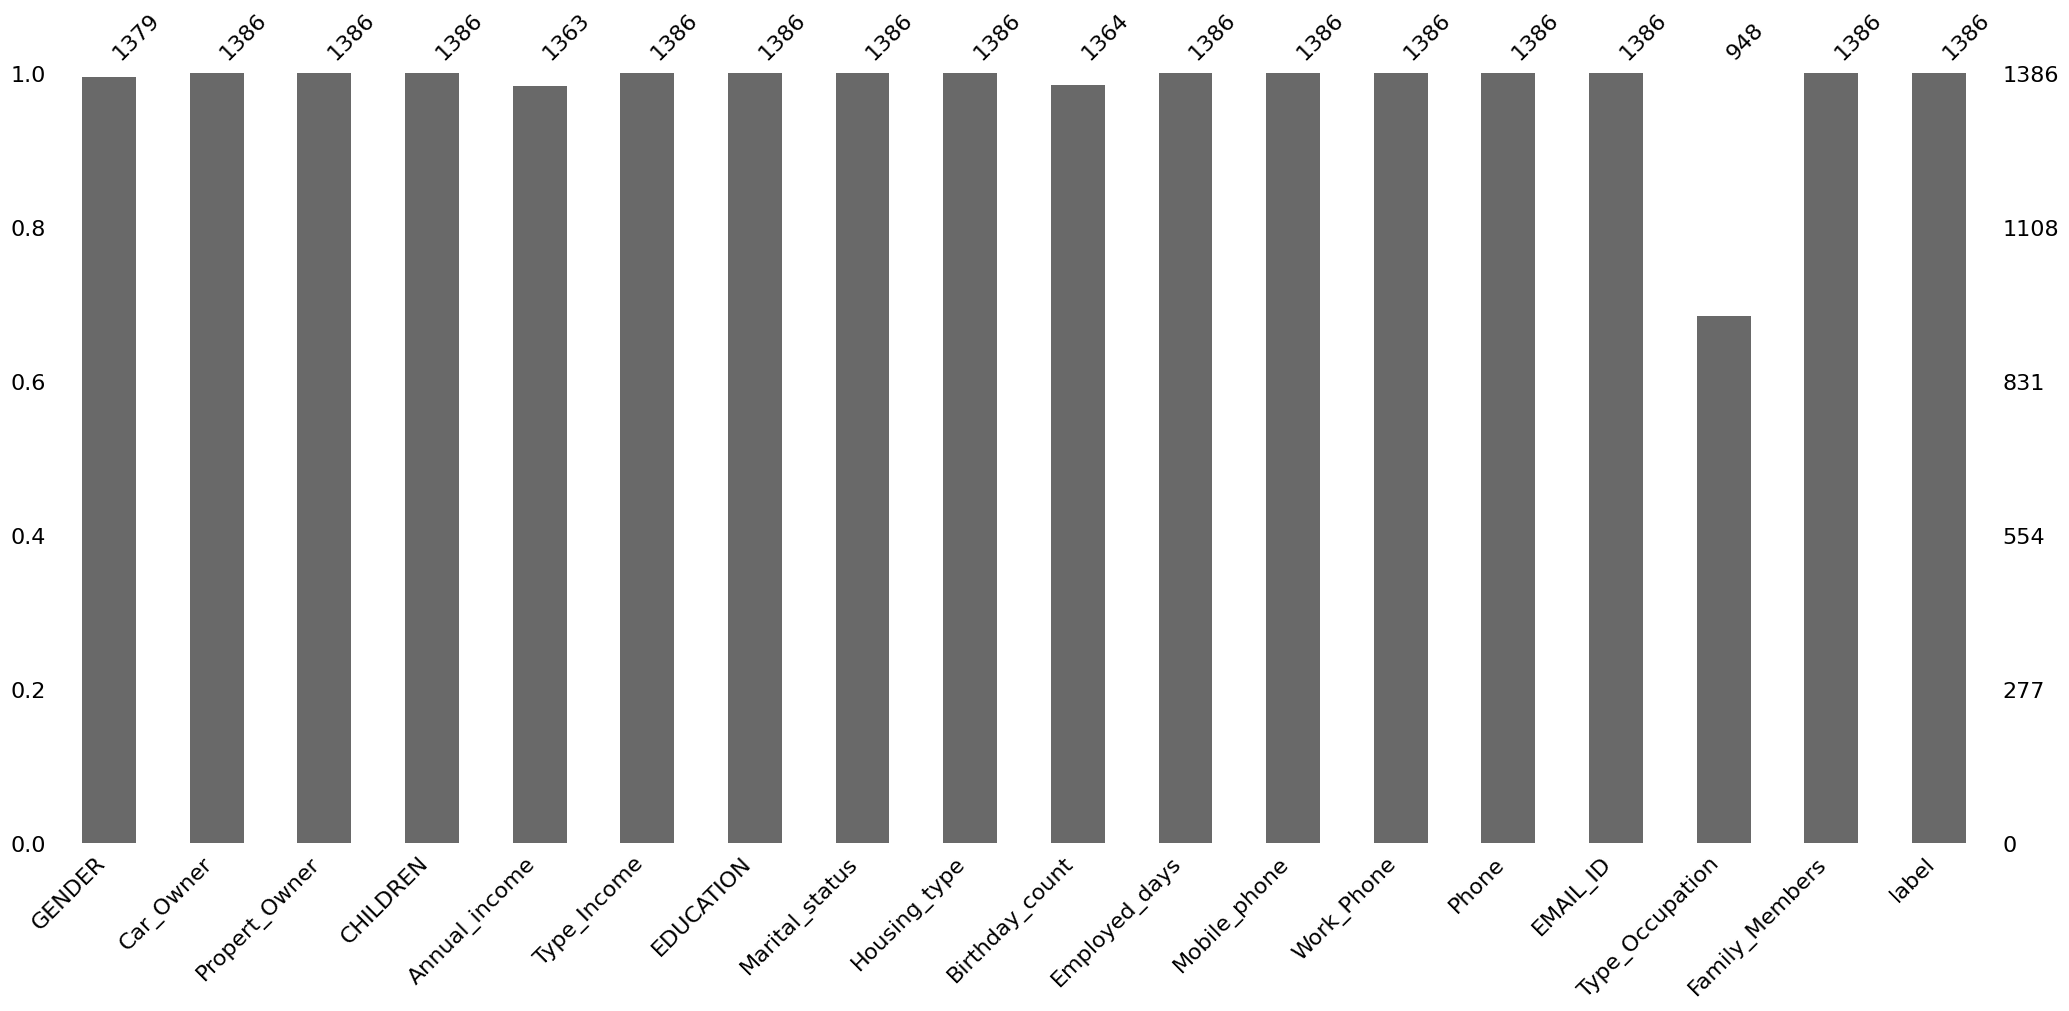

In [ ]:
msno.bar(merged_data)

<Axes: >

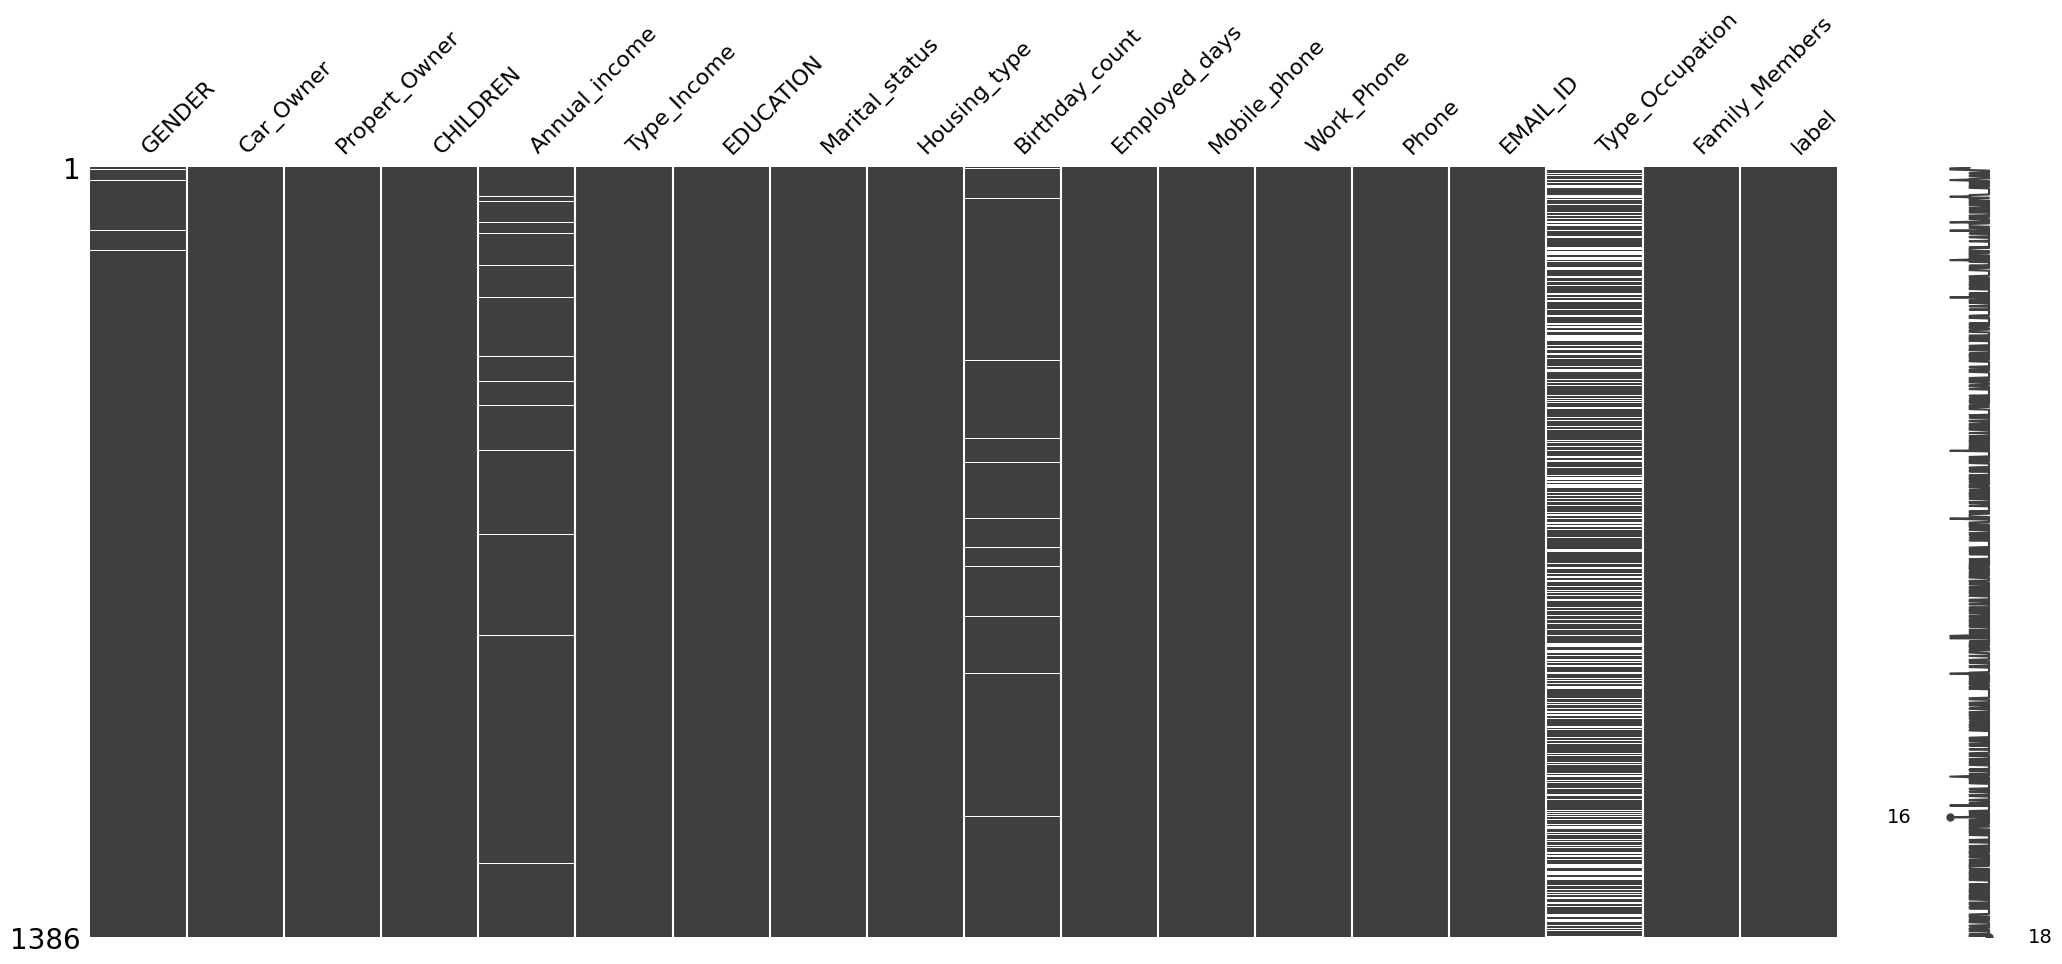

In [ ]:
msno.matrix(merged_data)

## Handeling the missing value

Data is missing at random and except Type_Occupation all are very less so can completely dropped them

In [ ]:
merged_data.dropna(axis=0,subset=['GENDER','Annual_income','Birthday_count'],how='any',inplace=True)

In [ ]:
merged_data.shape

(1334, 18)

I started with 1548 columns.After dropping duplicates 1386 columns remained .finally after dropping null i got 1334

In [ ]:
merged_data['Type_Occupation'].value_counts()

Laborers                 231
Core staff               152
Managers                 110
Sales staff              107
Drivers                   76
High skill tech staff     56
Medicine staff            42
Accountants               39
Security staff            20
Cleaning staff            18
Cooking staff             18
Private service staff     16
Low-skill Laborers         9
Secretaries                8
Waiters/barmen staff       5
HR staff                   3
Realty agents              2
IT staff                   1
Name: Type_Occupation, dtype: int64

In [ ]:
df=merged_data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1334 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           1334 non-null   object 
 1   Car_Owner        1334 non-null   object 
 2   Propert_Owner    1334 non-null   object 
 3   CHILDREN         1334 non-null   int64  
 4   Annual_income    1334 non-null   float64
 5   Type_Income      1334 non-null   object 
 6   EDUCATION        1334 non-null   object 
 7   Marital_status   1334 non-null   object 
 8   Housing_type     1334 non-null   object 
 9   Birthday_count   1334 non-null   float64
 10  Employed_days    1334 non-null   int64  
 11  Mobile_phone     1334 non-null   int64  
 12  Work_Phone       1334 non-null   int64  
 13  Phone            1334 non-null   int64  
 14  EMAIL_ID         1334 non-null   int64  
 15  Type_Occupation  913 non-null    object 
 16  Family_Members   1334 non-null   int64  
 17  label         

In [ ]:
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
7,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,NaN,2,1
8,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1
9,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1


Majority of features are catagorical so reviewing them in bar chart

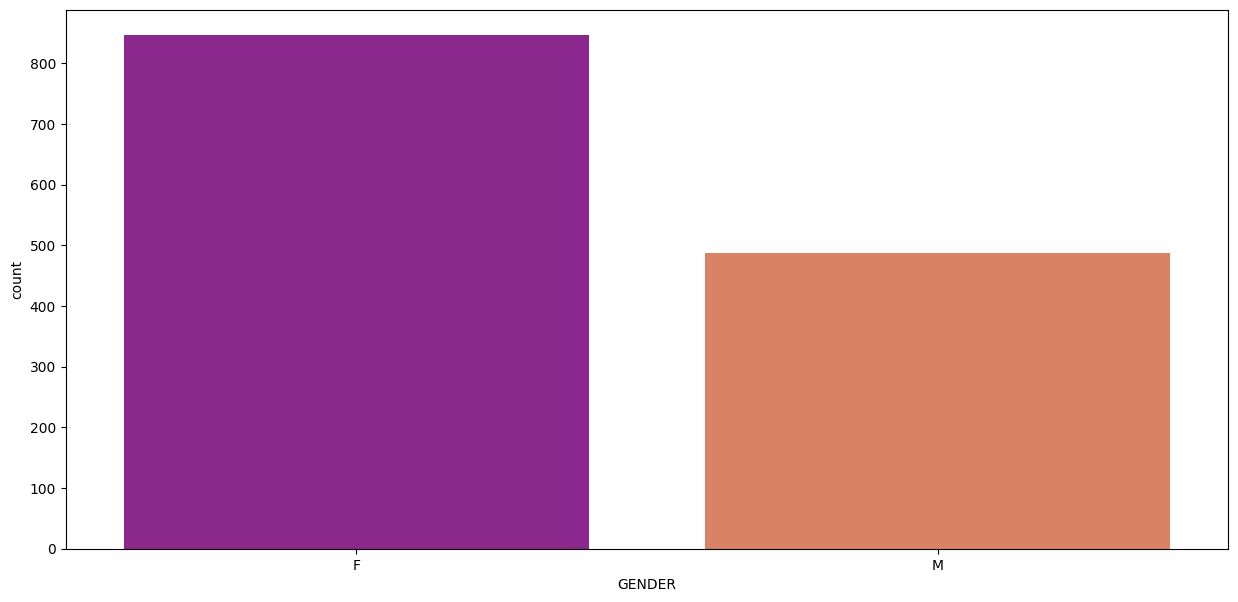

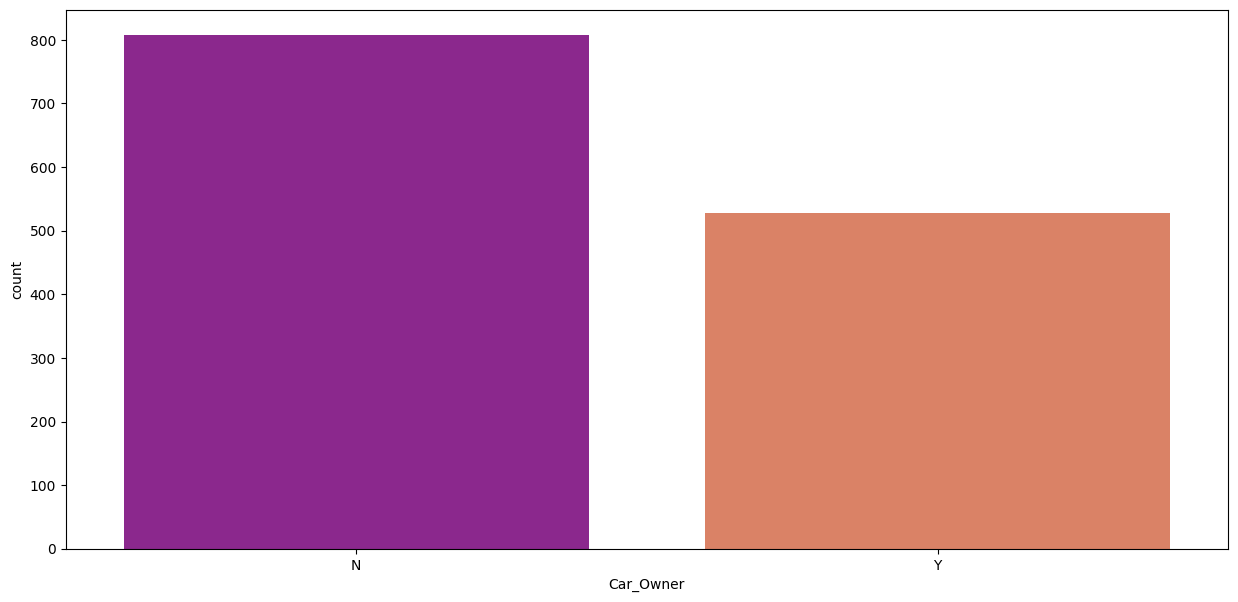

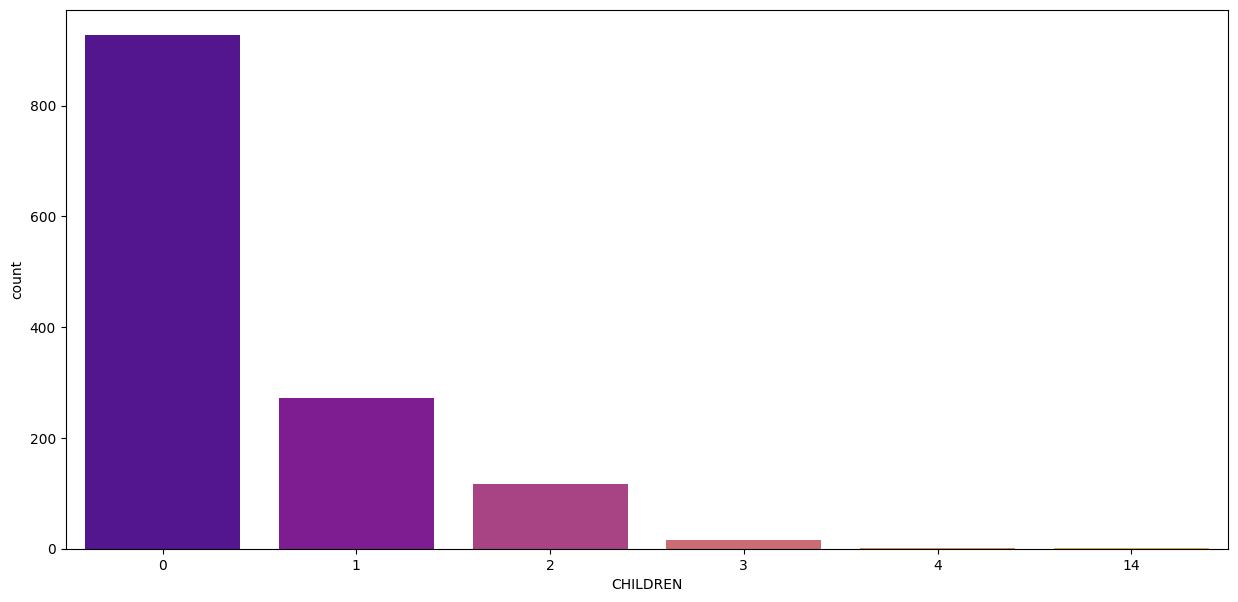

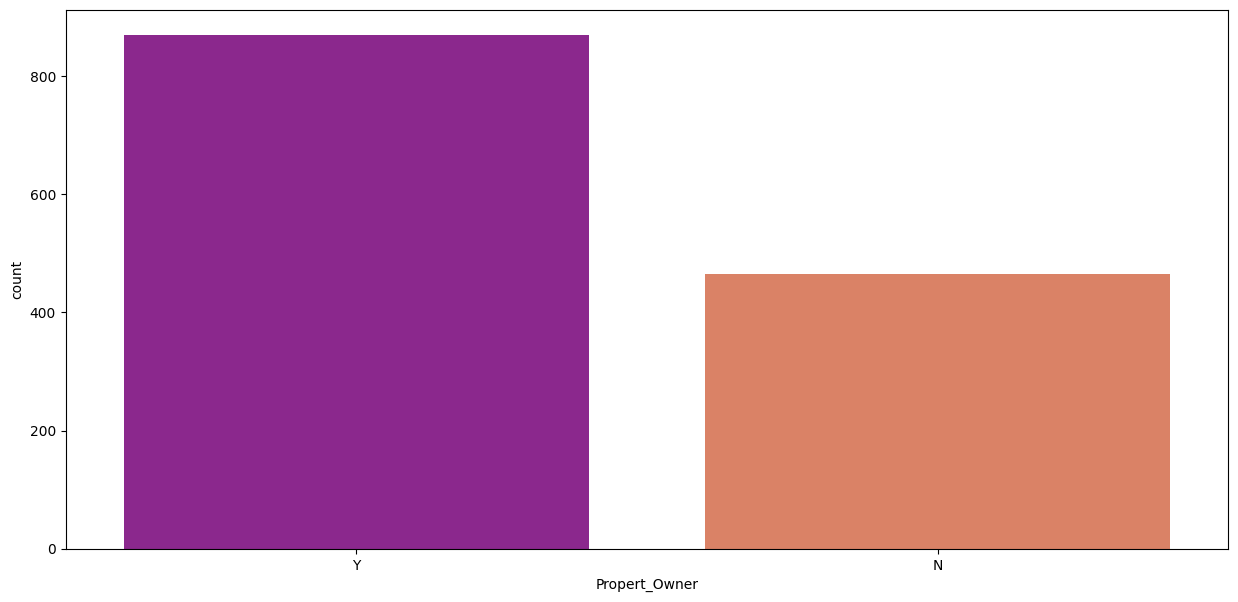

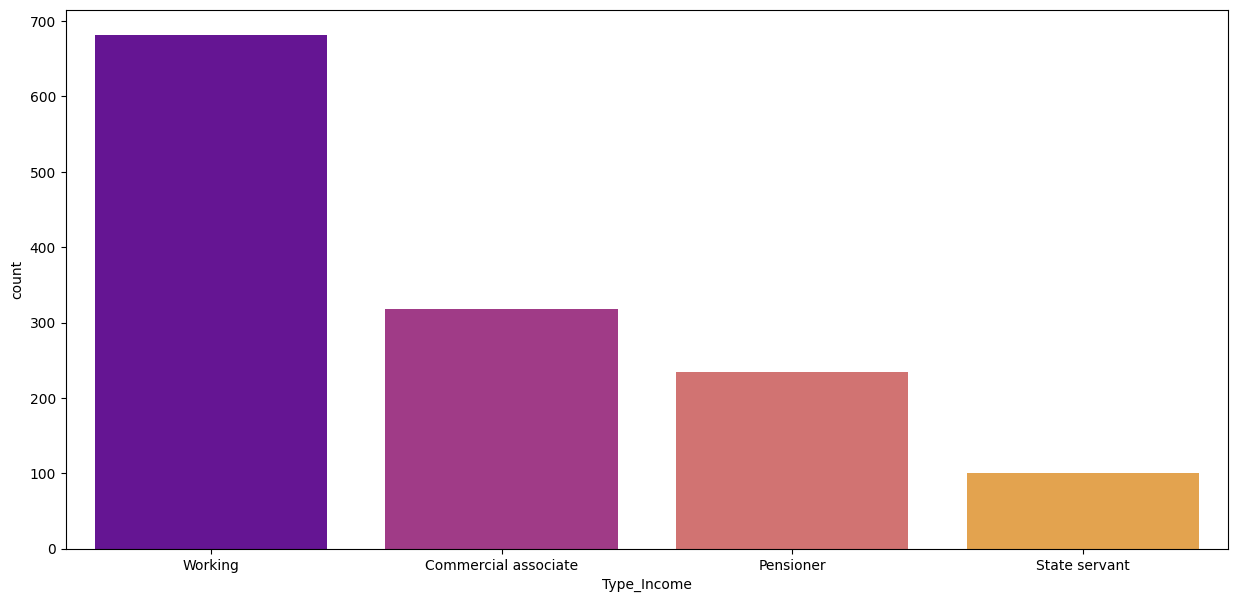

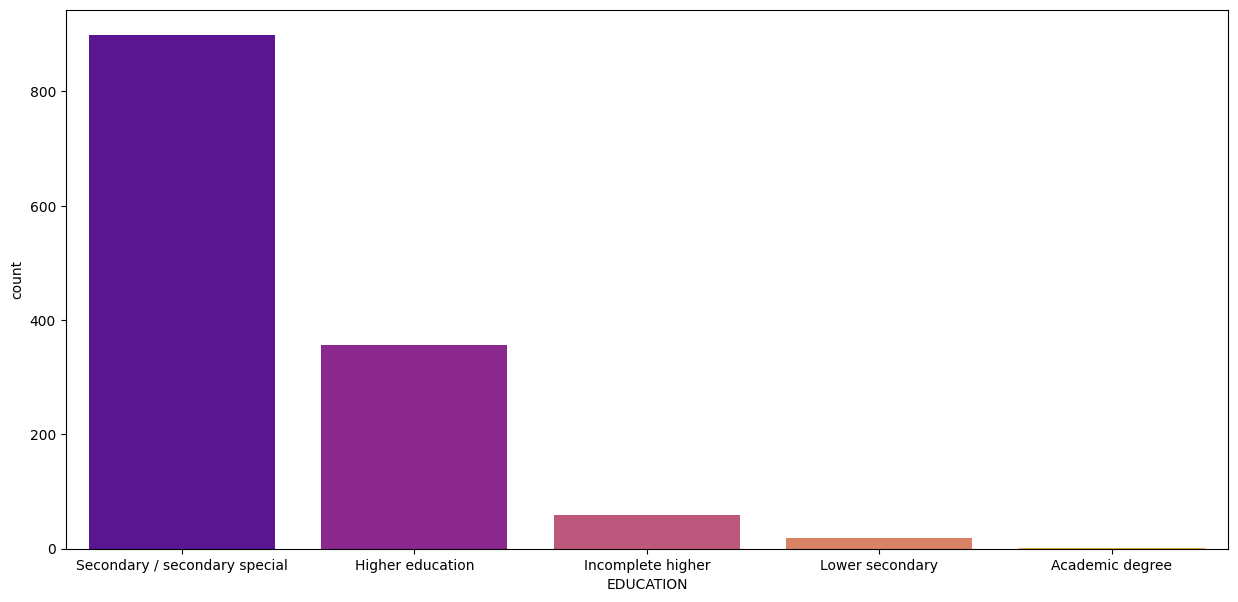

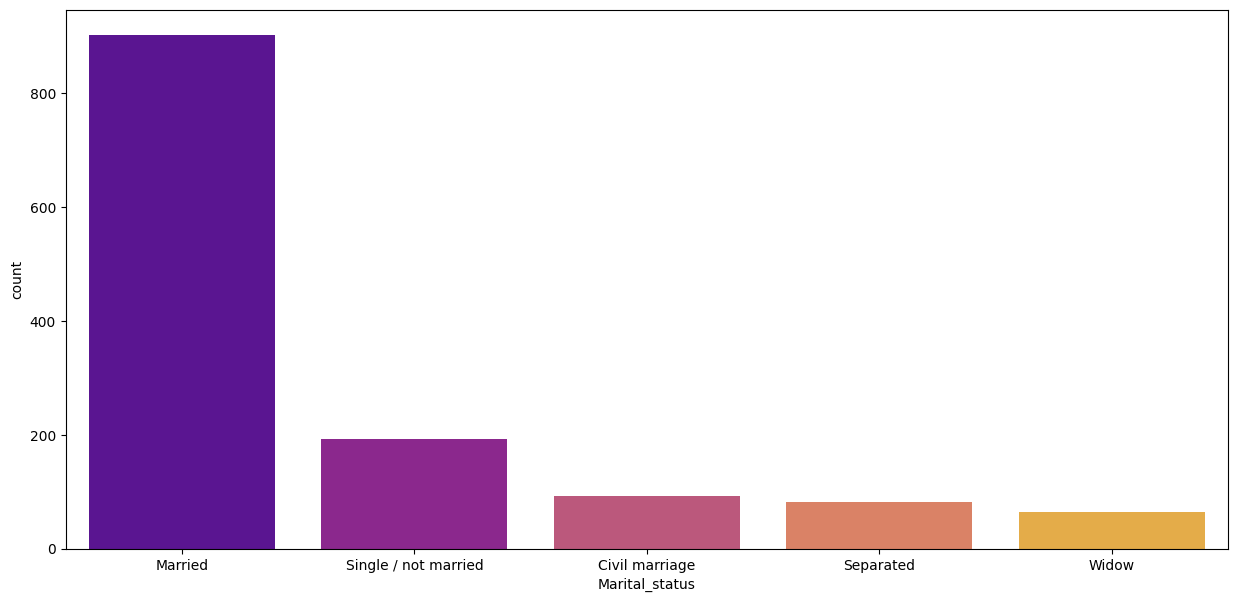

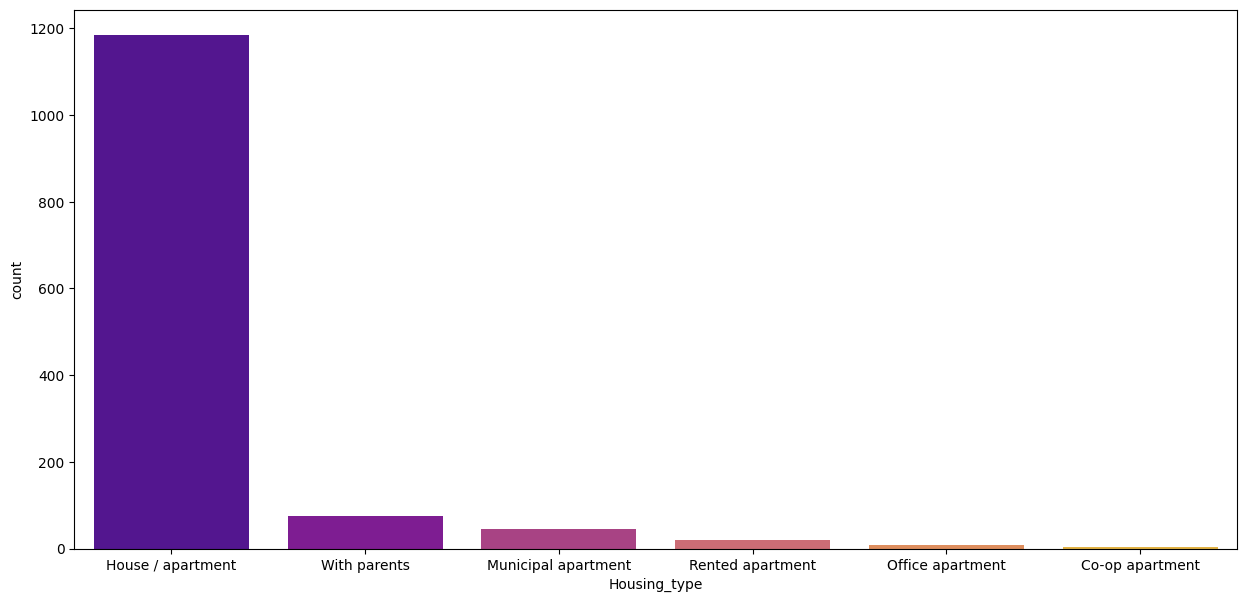

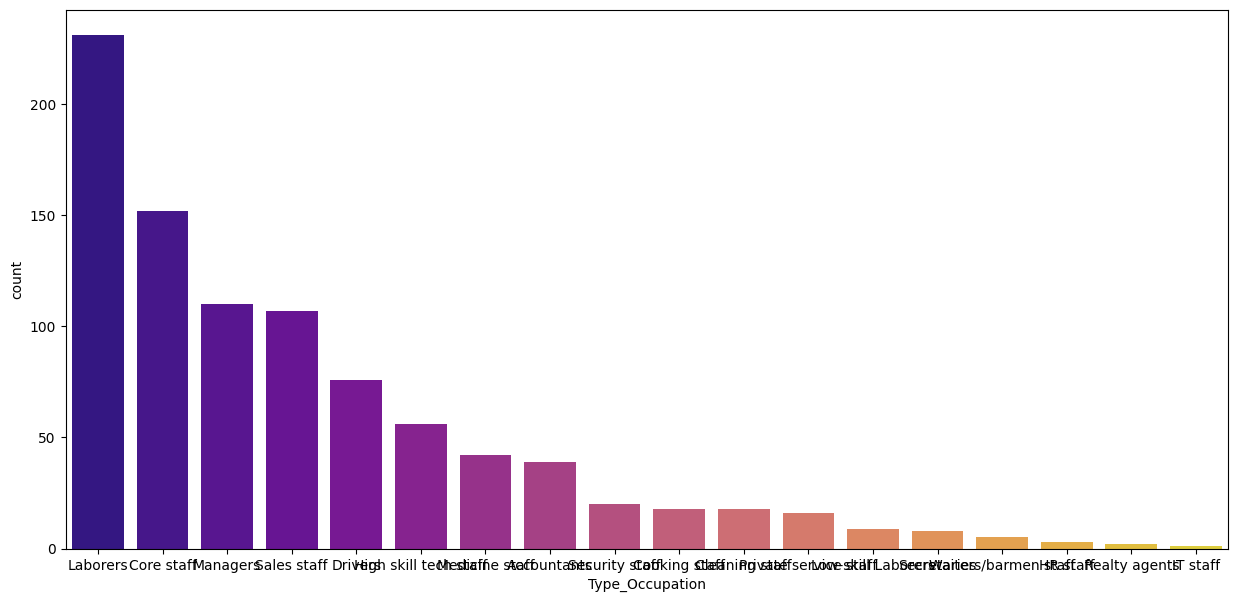

In [ ]:
toview = ['GENDER', 'Car_Owner','CHILDREN','Propert_Owner','Type_Income','EDUCATION','Marital_status','Housing_type','Type_Occupation']
for col in toview:
  plt.figure(figsize=(15,7))
  sorted_counts=df[col].value_counts().sort_values(ascending=False)
  sns.countplot(x=df[col],order=sorted_counts.index,palette='plasma')


* Majority of the data is taken from female
* Most of the people who were applying do not own a car
* Most people don't have any children ,for one person is showing 14 children ,clearly a outlier
* Most individuals in the dataset are property owners, it might be play a critical role in credit card approval system .
* In Income type most of the people are of working catogery type follwed by commercial associate ,pensioner and state servent
* Most of the people have done secondary special or higher very few are below that or have a higher education
* Majority of indivisual are married wile rest are single,divorced,seperated .For better processing i have divided these into two catagories either married or not married .later can be converted to onehot encoding
* Same case here.More than 95% people are living in House/Apartment so it would not be decinding factor
* I am planning to drop this column as there are too many missing value and there a varity of catagories are there

In [ ]:
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
7,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,NaN,2,1
8,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1
9,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1


Birthday_count is in negative number and is represented in days so converting it to yearwise

In [ ]:
df['Birthday_count']=round(df['Birthday_count']/-365)


In [ ]:
import copy
sql=copy.deepcopy(df)

Going to change the data for ml project so need a copy in case want to revert it and later for sql part

In [ ]:
df['Employed_days']=np.where(df['Employed_days']<0,1,0)

In [ ]:
df['GENDER']=np.where(df['GENDER']=='M',1,0)

In [ ]:
df['Car_Owner']=np.where(df['Car_Owner']=='Y',1,0)

In [ ]:
df['Propert_Owner']=np.where(df['Propert_Owner']=='Y',1,0)

In [ ]:
df['Marital_status'].value_counts()

Married                 902
Single / not married    193
Civil marriage           93
Separated                81
Widow                    65
Name: Marital_status, dtype: int64

In [ ]:
df['EDUCATION'].value_counts()

Secondary / secondary special    898
Higher education                 357
Incomplete higher                 59
Lower secondary                   18
Academic degree                    2
Name: EDUCATION, dtype: int64

person with a family have a high chance of getting credit card approved .Although onehot encoding can also be applicable here I will try if i am not getting good result.

In [ ]:
df['Marital_status']=np.where(df['Marital_status']=='Married',1,0)

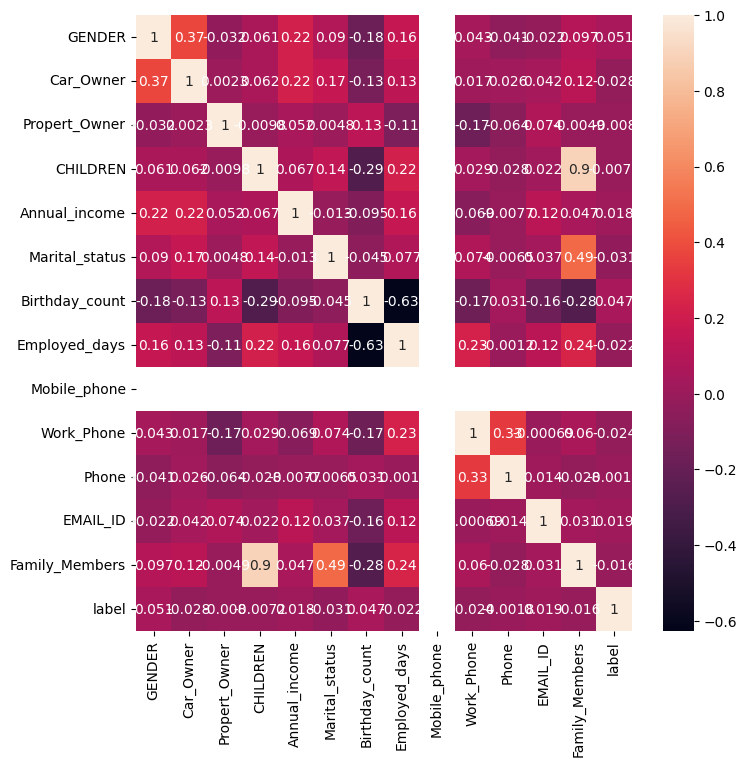

In [ ]:
plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Dropping some columns

In [ ]:
df['Mobile_phone'].value_counts()

1    1334
Name: Mobile_phone, dtype: int64

dropping the data

---



*   everyone has mobile phone so no point keeping it
*   children is highly co related to family member so dropping the children column
*   type occupation has too many missing value so dropping it




   



In [ ]:
df.drop(columns=['Mobile_phone','CHILDREN','Type_Occupation'],inplace=True)

as children is highly co related to family member

In [ ]:
df.head()

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,1,1,1,180000.0,Pensioner,Higher education,1,House / apartment,51.0,0,0,0,0,2,1
1,0,1,0,315000.0,Commercial associate,Higher education,1,House / apartment,37.0,1,1,1,0,2,1
7,0,0,0,180000.0,Pensioner,Secondary / secondary special,1,House / apartment,61.0,0,0,0,0,2,1
8,1,1,1,450000.0,Commercial associate,Secondary / secondary special,1,House / apartment,50.0,1,0,1,1,3,1
9,1,1,1,450000.0,Pensioner,Secondary / secondary special,1,House / apartment,50.0,1,0,1,1,3,1


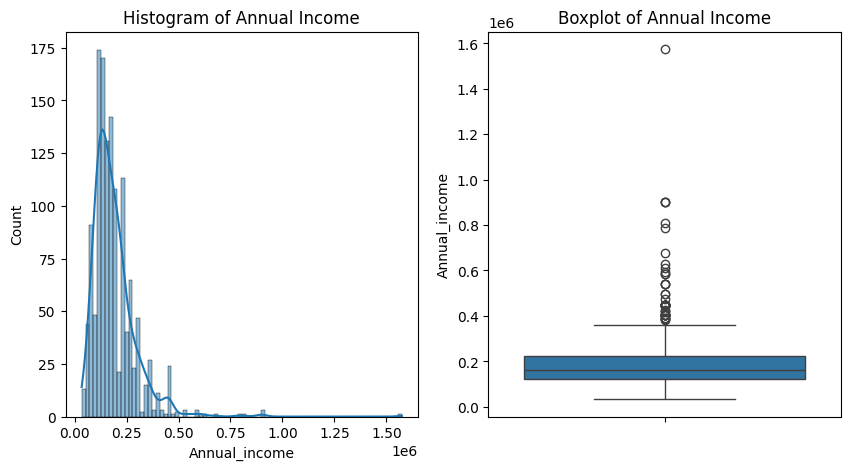

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the histogram on the first subplot.
sns.histplot(df['Annual_income'], kde='True', ax=axes[0])
axes[0].set_title('Histogram of Annual Income')

# Plot the boxplot on the second subplot.
sns.boxplot(df['Annual_income'], ax=axes[1])
axes[1].set_title('Boxplot of Annual Income')

# Show the plot.
plt.show()

## Removing outlier

 its a right skewed data suggesting that majority of the people are in low income catagory .Log trasformation can be done in it to make it normally distributed data

In [ ]:
# Finding the IQR
percentile25 = df['Annual_income'].quantile(0.25)
percentile75 = df['Annual_income'].quantile(0.75)
iqr = percentile75 - percentile25

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 380250.0
Lower limit -33750.0


In [ ]:
df[df['Annual_income'] > upper_limit].shape

(60, 15)

In [ ]:
df['Annual_income']=np.where(df['Annual_income']>upper_limit,upper_limit,df['Annual_income'])

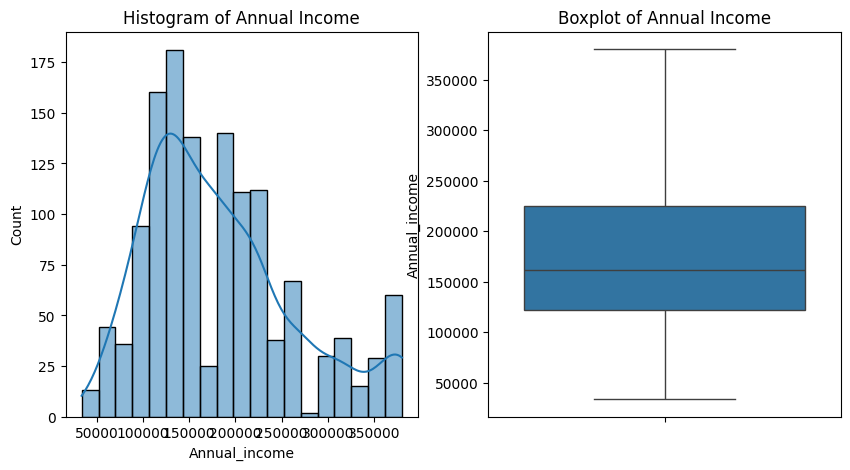

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the histogram on the first subplot.
sns.histplot(df['Annual_income'], kde='True', ax=axes[0])
axes[0].set_title('Histogram of Annual Income')

# Plot the boxplot on the second subplot.
sns.boxplot(df['Annual_income'], ax=axes[1])
axes[1].set_title('Boxplot of Annual Income')

# Show the plot.
plt.show()

It is not exactly a normal distribution but close to it

In [ ]:
# from sklearn import preprocessing
# minmax = preprocessing.MinMaxScaler()
# minmax.fit_transform(df[['Annual_income']])


In [ ]:
df.head()

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,1,1,1,180000.0,Pensioner,Higher education,1,House / apartment,51.0,0,0,0,0,2,1
1,0,1,0,315000.0,Commercial associate,Higher education,1,House / apartment,37.0,1,1,1,0,2,1
7,0,0,0,180000.0,Pensioner,Secondary / secondary special,1,House / apartment,61.0,0,0,0,0,2,1
8,1,1,1,380250.0,Commercial associate,Secondary / secondary special,1,House / apartment,50.0,1,0,1,1,3,1
9,1,1,1,380250.0,Pensioner,Secondary / secondary special,1,House / apartment,50.0,1,0,1,1,3,1


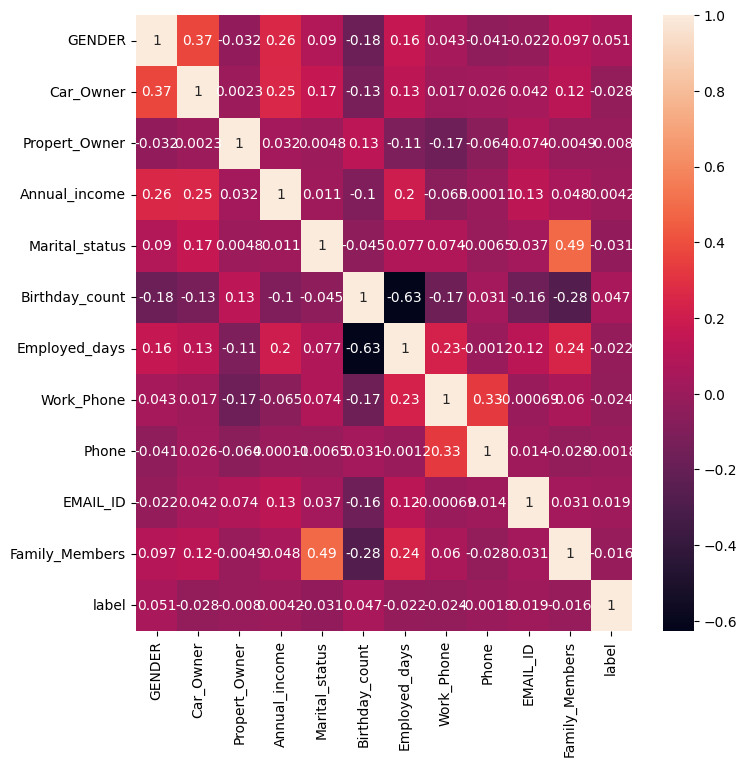

In [ ]:
plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

education_encoder = OrdinalEncoder(categories=[['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree']])
df['EDUCATION'] = education_encoder.fit_transform(df[['EDUCATION']])

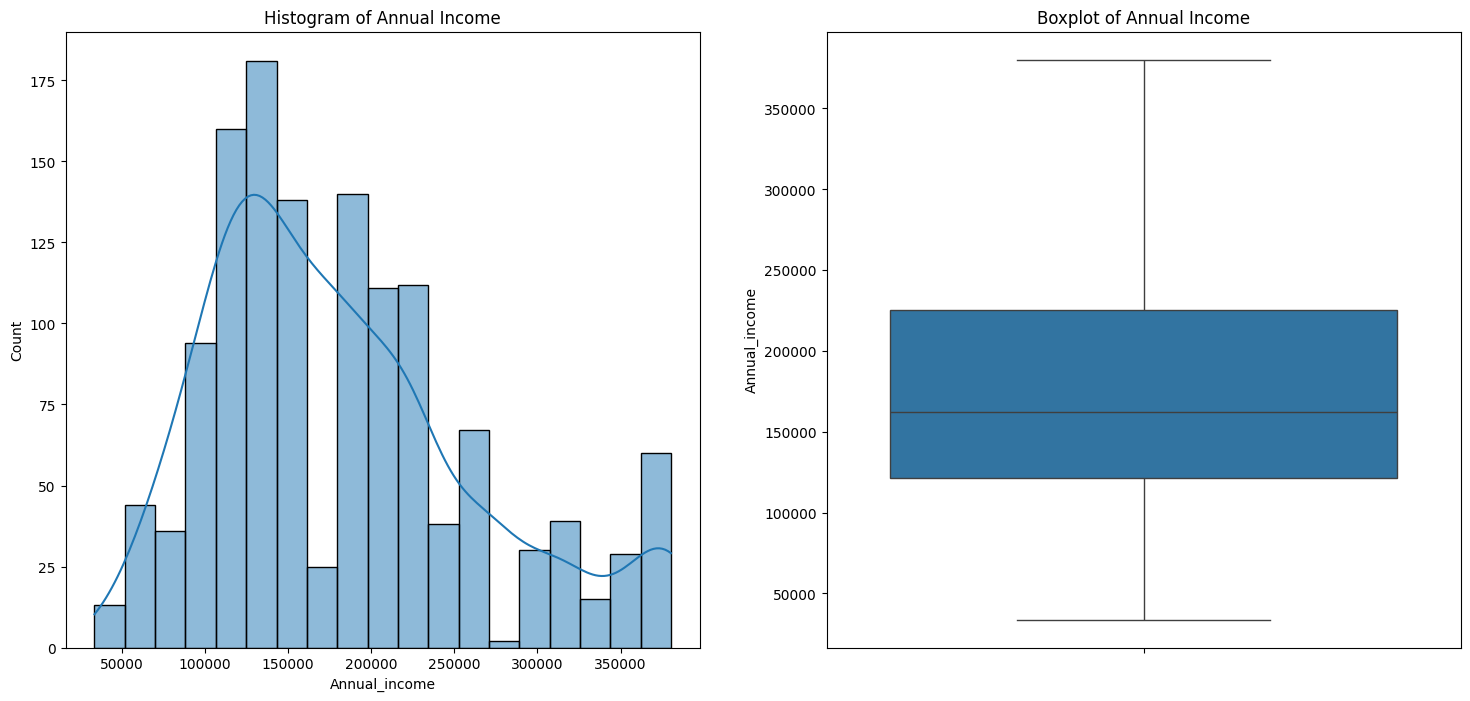

In [ ]:
# prompt: sns.histplot(df['Annual_income'],kde='True') sns.boxplot(df['Annual_income'])  plot these two on same plot

import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots.
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot the histogram on the first subplot.
sns.histplot(df['Annual_income'], kde='True', ax=axes[0])
axes[0].set_title('Histogram of Annual Income')

# Plot the boxplot on the second subplot.
sns.boxplot(df['Annual_income'], ax=axes[1])
axes[1].set_title('Boxplot of Annual Income')

# Show the plot.
plt.show()


In [ ]:
df.Type_Income.value_counts()  # needs one hot encoding

Working                 681
Commercial associate    318
Pensioner               235
State servant           100
Name: Type_Income, dtype: int64

In [ ]:
df.Housing_type.value_counts()  # needs one hot encoding

House / apartment      1184
With parents             74
Municipal apartment      45
Rented apartment         20
Office apartment          8
Co-op apartment           3
Name: Housing_type, dtype: int64

<Axes: xlabel='Birthday_count', ylabel='Count'>

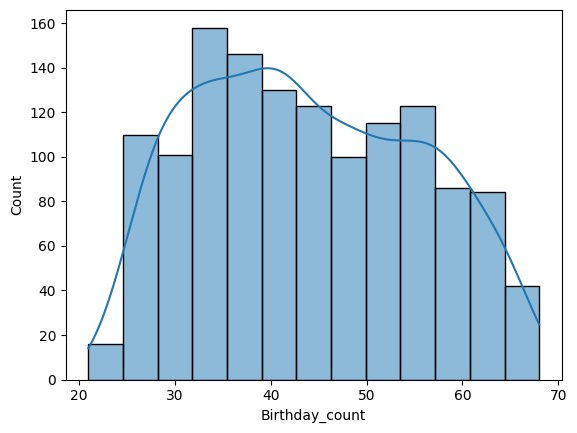

In [ ]:
sns.histplot(df.Birthday_count,kde=True) # looks ok

<Axes: ylabel='Birthday_count'>

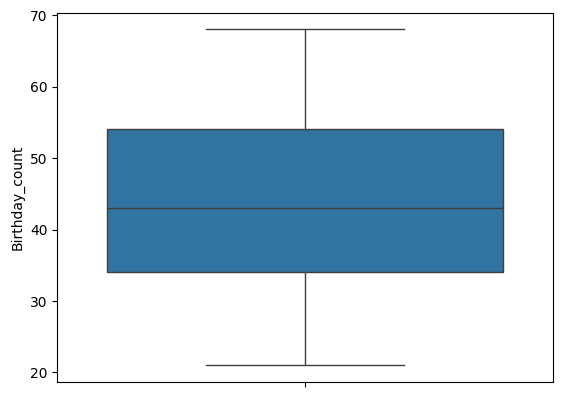

In [ ]:
sns.boxplot(df.Birthday_count)

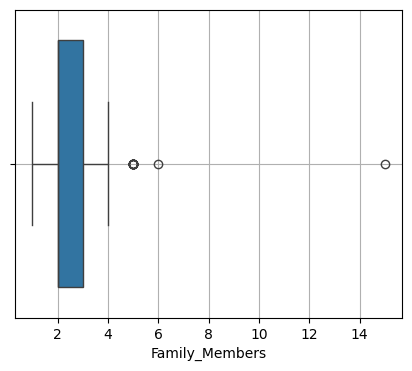

In [ ]:
plt.figure(figsize =(5,4))

sns.boxplot(data=df , x='Family_Members')

plt.grid()
plt.show()

In [ ]:
# removing the exterme value

df = df[df['Family_Members'] < 14]

In [ ]:
df.head()

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,1,1,1,180000.0,Pensioner,3.0,1,House / apartment,51.0,0,0,0,0,2,1
1,0,1,0,315000.0,Commercial associate,3.0,1,House / apartment,37.0,1,1,1,0,2,1
7,0,0,0,180000.0,Pensioner,1.0,1,House / apartment,61.0,0,0,0,0,2,1
8,1,1,1,380250.0,Commercial associate,1.0,1,House / apartment,50.0,1,0,1,1,3,1
9,1,1,1,380250.0,Pensioner,1.0,1,House / apartment,50.0,1,0,1,1,3,1


## Feature Transformation

In [ ]:
# columns to onehot encoding
one_cols = df[['Type_Income','Housing_type']]

df = pd.get_dummies(df, columns=['Type_Income','Housing_type'],drop_first=True)  # drop_first to avoid multicolinearity

In [ ]:
df.head()

,GENDER,Car_Owner,Propert_Owner,Annual_income,EDUCATION,Marital_status,Birthday_count,Employed_days,Work_Phone,Phone,...,Family_Members,label,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
0,1,1,1,180000.0,3.0,1,51.0,0,0,0,...,2,1,1,0,0,1,0,0,0,0
1,0,1,0,315000.0,3.0,1,37.0,1,1,1,...,2,1,0,0,0,1,0,0,0,0
7,0,0,0,180000.0,1.0,1,61.0,0,0,0,...,2,1,1,0,0,1,0,0,0,0
8,1,1,1,380250.0,1.0,1,50.0,1,0,1,...,3,1,0,0,0,1,0,0,0,0
9,1,1,1,380250.0,1.0,1,50.0,1,0,1,...,3,1,1,0,0,1,0,0,0,0


## Normalization

In [ ]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler()
minmax.fit_transform(df[['Annual_income','Birthday_count']])

array([[0.42207792, 0.63829787],
       [0.81168831, 0.34042553],
       [0.42207792, 0.85106383],
       ...,
       [0.55194805, 0.14893617],
       [0.68181818, 0.44680851],
       [0.55194805, 0.5106383 ]])

In [ ]:
onehot=pd.DataFrame(minmax.fit_transform(df[['Annual_income','Birthday_count']]),columns=['Annual_income','Birthday_count'])

In [ ]:
onehot

,Annual_income,Birthday_count
0,0.422078,0.638298
1,0.811688,0.340426
2,0.422078,0.851064
3,1.000000,0.617021
4,1.000000,0.617021
...,...,...
1328,0.318182,0.297872
1329,0.941558,0.212766
1330,0.551948,0.148936
1331,0.681818,0.446809


In [ ]:
df=df.drop(columns=['Annual_income','Birthday_count'])

In [ ]:
df.isnull().sum()

GENDER                              0
Car_Owner                           0
Propert_Owner                       0
EDUCATION                           0
Marital_status                      0
Employed_days                       0
Work_Phone                          0
Phone                               0
EMAIL_ID                            0
Family_Members                      0
label                               0
Type_Income_Pensioner               0
Type_Income_State servant           0
Type_Income_Working                 0
Housing_type_House / apartment      0
Housing_type_Municipal apartment    0
Housing_type_Office apartment       0
Housing_type_Rented apartment       0
Housing_type_With parents           0
dtype: int64

In [ ]:
df.reset_index()

,index,GENDER,Car_Owner,Propert_Owner,EDUCATION,Marital_status,Employed_days,Work_Phone,Phone,EMAIL_ID,Family_Members,label,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
0,0,1,1,1,3.0,1,0,0,0,0,2,1,1,0,0,1,0,0,0,0
1,1,0,1,0,3.0,1,1,1,1,0,2,1,0,0,0,1,0,0,0,0
2,7,0,0,0,1.0,1,0,0,0,0,2,1,1,0,0,1,0,0,0,0
3,8,1,1,1,1.0,1,1,0,1,1,3,1,0,0,0,1,0,0,0,0
4,9,1,1,1,1.0,1,1,0,1,1,3,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,1540,0,1,1,3.0,1,1,0,0,0,3,0,0,0,1,1,0,0,0,0
1329,1542,1,1,0,1.0,1,1,0,1,0,3,0,0,1,0,1,0,0,0,0
1330,1544,0,0,0,2.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
1331,1546,1,1,0,1.0,0,1,1,1,0,2,0,0,0,1,1,0,0,0,0


In [ ]:
final_df=pd.concat([df.reset_index(),onehot],axis=1)

In [ ]:
final_df.sample(10)

,index,GENDER,Car_Owner,Propert_Owner,EDUCATION,Marital_status,Employed_days,Work_Phone,Phone,EMAIL_ID,...,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Annual_income,Birthday_count
685,785,0,0,1,3.0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0.681818,0.765957
457,536,1,0,1,1.0,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0.227273,0.191489
124,177,0,0,1,3.0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0.422078,0.297872
943,1071,1,1,1,2.0,1,1,0,1,0,...,0,0,1,1,0,0,0,0,0.655844,0.489362
499,583,0,0,1,3.0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0.616883,0.851064
560,648,0,0,1,1.0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0.357143,0.553191
854,969,1,1,1,3.0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0.941558,0.468085
1186,1363,0,0,0,1.0,1,1,0,1,0,...,0,0,1,1,0,0,0,0,0.292208,0.553191
54,77,0,1,1,3.0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0.487013,0.446809
826,940,0,0,0,1.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0.097403,0.808511


In [ ]:
df=final_df.drop(columns=['index'])

In [ ]:
df

,GENDER,Car_Owner,Propert_Owner,EDUCATION,Marital_status,Employed_days,Work_Phone,Phone,EMAIL_ID,Family_Members,...,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Annual_income,Birthday_count
0,1,1,1,3.0,1,0,0,0,0,2,...,1,0,0,1,0,0,0,0,0.422078,0.638298
1,0,1,0,3.0,1,1,1,1,0,2,...,0,0,0,1,0,0,0,0,0.811688,0.340426
2,0,0,0,1.0,1,0,0,0,0,2,...,1,0,0,1,0,0,0,0,0.422078,0.851064
3,1,1,1,1.0,1,1,0,1,1,3,...,0,0,0,1,0,0,0,0,1.000000,0.617021
4,1,1,1,1.0,1,1,0,1,1,3,...,1,0,0,1,0,0,0,0,1.000000,0.617021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,0,1,1,3.0,1,1,0,0,0,3,...,0,0,1,1,0,0,0,0,0.318182,0.297872
1329,1,1,0,1.0,1,1,0,1,0,3,...,0,1,0,1,0,0,0,0,0.941558,0.212766
1330,0,0,0,2.0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0.551948,0.148936
1331,1,1,0,1.0,0,1,1,1,0,2,...,0,0,1,1,0,0,0,0,0.681818,0.446809


## Dealing with Imabalance in Dataset

In [ ]:
df.label.value_counts()

0    1211
1     122
Name: label, dtype: int64

In [ ]:
X = df.drop(columns=['label'])
y = df['label']

# importing SMOTE
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X, y = oversample.fit_resample(X, y)

In [ ]:
y.value_counts()

1    1211
0    1211
Name: label, dtype: int64

# Model implimanting

It is a classification problem 1 representing approved and 0 representing rejected


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold


## svm

In [ ]:
from sklearn import svm
model = svm.SVC()

In [ ]:
parameters_grid = {'C': [0.1, 1, 10, 100], # Large C -> small margin less mis classified; Small C - large margin more mis classifications
                   'gamma': [1, 0.1, 0.01], # Bigger Gamma more linear boundary; smaller gamma more complex model
                   'kernel': ['rbf']}


In [ ]:
skf = StratifiedKFold(n_splits=4)
grid = GridSearchCV(estimator = model,
                    param_grid = parameters_grid,
                    scoring = 'precision', # = (TPR + TFR)/2.0
                    cv = skf,
                    verbose = 1) #use 3

In [ ]:
gridResult = grid.fit(X_train, y_train)
print(f"Best result = {gridResult.best_score_:1.2f} and parameters = {gridResult.best_params_}")

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best result = 0.82 and parameters = {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
finalModel = gridResult.best_estimator_
finalModel.fit(X_train, y_train)
y_pred= finalModel.predict(X_test)

# y_pred

In [ ]:
y_pred_train = finalModel.predict(X_train)
y_pred_test  = finalModel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))
print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       0.89      0.84      0.86       241
           1       0.85      0.89      0.87       244

    accuracy                           0.87       485
   macro avg       0.87      0.87      0.87       485
weighted avg       0.87      0.87      0.87       485

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       970
           1       0.92      0.98      0.95       967

    accuracy                           0.95      1937
   macro avg       0.95      0.95      0.95      1937
weighted avg       0.95      0.95      0.95      1937



In [ ]:
data = [["svm", 0.87]]
result = pd.DataFrame(data, columns=["Model", "Test Accuracy"])

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# defining parameter range
parameters_grid = {'criterion': ['entropy', 'gini', 'log_loss'],
                   'max_depth': [3,5,6], # Max : sqrt(Number of Features) : applies for datases with more columns
                   'n_estimators': [100, 150],
                   'min_samples_leaf' : [10,20]
                  }

In [ ]:
skf = StratifiedKFold(n_splits=4)
grid = GridSearchCV(estimator = model,
                    param_grid = parameters_grid,
                    scoring = 'balanced_accuracy', # = (TPR + TFR)/2.0
                    cv = skf,
                    verbose = 1)

In [ ]:
gridResult = grid.fit(X_train, y_train)
print(f"Best result = {gridResult.best_score_:1.2f} and parameters = {gridResult.best_params_}")

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Best result = 0.76 and parameters = {'criterion': 'log_loss', 'max_depth': 6, 'min_samples_leaf': 10, 'n_estimators': 100}


In [ ]:
# finalModel = RandomForestClassifier(n_estimators= 100, criterion="log_loss", max_depth = 6)
finalModel = gridResult.best_estimator_
finalModel.fit(X_train, y_train)
y_pred= finalModel.predict(X_test)

# y_pred

In [ ]:
y_pred_train = finalModel.predict(X_train)
y_pred_test  = finalModel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))
print(classification_report(y_train, y_pred_train))





              precision    recall  f1-score   support

           0       0.77      0.71      0.74       241
           1       0.74      0.79      0.76       244

    accuracy                           0.75       485
   macro avg       0.75      0.75      0.75       485
weighted avg       0.75      0.75      0.75       485

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       970
           1       0.75      0.86      0.80       967

    accuracy                           0.79      1937
   macro avg       0.79      0.79      0.79      1937
weighted avg       0.79      0.79      0.79      1937



In [ ]:
result.loc[1] = ["Random Forest", 0.75]

## knnclassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()

# defining parameter range
parameters_grid = {'n_neighbors': [1,3],
                   'metric':['minkowski'],
                  'p': [1,2,3],
                  'weights':['uniform', 'distance']
                  }


In [ ]:
skf = StratifiedKFold(n_splits=4)
grid = GridSearchCV(estimator = model,
                    param_grid = parameters_grid,
                    scoring = 'balanced_accuracy', # = (TPR + TFR)/2.0
                    cv = skf,
                    verbose = 1) #use 3

# fitting the model for grid search

gridResult = grid.fit(X_train, y_train)
print(f"Best result = {gridResult.best_score_:1.2f} and parameters = {gridResult.best_params_}")

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best result = 0.84 and parameters = {'metric': 'minkowski', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


In [ ]:
finalModel = gridResult.best_estimator_
finalModel.fit(X_train, y_train)
y_pred= finalModel.predict(X_test)

# y_pred

In [ ]:
y_pred_train = finalModel.predict(X_train)
y_pred_test  = finalModel.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_test))
print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       0.90      0.78      0.84       241
           1       0.81      0.91      0.86       244

    accuracy                           0.85       485
   macro avg       0.86      0.85      0.85       485
weighted avg       0.86      0.85      0.85       485

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       970
           1       1.00      0.99      1.00       967

    accuracy                           1.00      1937
   macro avg       1.00      1.00      1.00      1937
weighted avg       1.00      1.00      1.00      1937



In [ ]:
result.loc[2] = ["knn", 0.85]

In knn classifier model perform well on train data .As these are the data where knn get trained

## xgboost

In [ ]:
import xgboost as xgb

#For classification
model = xgb.XGBClassifier(objective ='binary:logistic')



parameters_grid = {'criterion': ['entropy', 'gini', 'log_loss'],
                   'max_depth': [3,5,6],
                   'n_estimators': [50,60],
                   'learning_rate' : [0.05, 0.1, 0.2],
                   'colsample_bytree' : [0.3, 0.5],
                   'alpha' : [1,2]
                  }

In [ ]:
skf = StratifiedKFold(n_splits=4)
grid = GridSearchCV(estimator = model,
                    param_grid = parameters_grid,
                    scoring = 'balanced_accuracy', # = (TPR + TFR)/2.0
                    cv = skf,
                    verbose = 1) #use 3

# fitting the model for grid search

gridResult = grid.fit(X_train, y_train)
print(f"Best result = {gridResult.best_score_:1.2f} and parameters = {gridResult.best_params_}")

Fitting 4 folds for each of 216 candidates, totalling 864 fits
Best result = 0.86 and parameters = {'alpha': 1, 'colsample_bytree': 0.5, 'criterion': 'entropy', 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 60}


In [ ]:
finalModel = gridResult.best_estimator_
finalModel.fit(X_train, y_train)
y_pred= finalModel.predict(X_test)

# y_pred
print(classification_report(y_test, y_pred_test))
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       241
           1       0.81      0.91      0.86       244

    accuracy                           0.85       485
   macro avg       0.86      0.85      0.85       485
weighted avg       0.86      0.85      0.85       485

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       970
           1       1.00      0.99      1.00       967

    accuracy                           1.00      1937
   macro avg       1.00      1.00      1.00      1937
weighted avg       1.00      1.00      1.00      1937



In [ ]:
result.loc[3] = ["xgboost", 0.85]

## logistic regrssion

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_reg = LogisticRegression(random_state = 0)

In [ ]:
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
logistic_reg_pred=logistic_reg.predict(X_test)

In [ ]:
print(classification_report(y_test, logistic_reg_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       241
           1       0.71      0.69      0.70       244

    accuracy                           0.70       485
   macro avg       0.70      0.70      0.70       485
weighted avg       0.70      0.70      0.70       485



In [ ]:
result.loc[4] = ["Logistic regression", 0.70]

In [ ]:
result

,Model,Test Accuracy
0,svm,0.87
1,Random Forest,0.75
2,knn,0.85
3,xgboost,0.85
4,Logistic regression,0.70


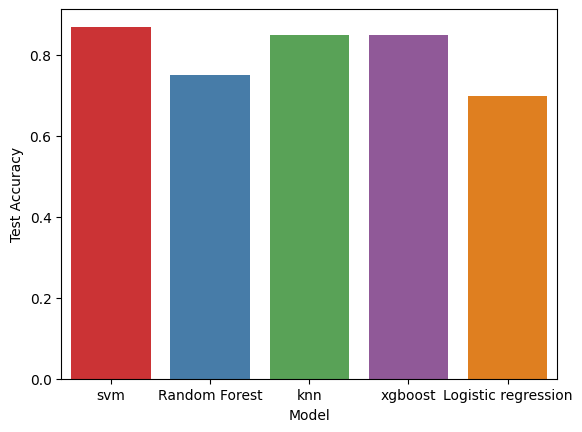

In [ ]:
sns.barplot(data=result,x='Model',y='Test Accuracy',palette="Set1")
plt.show()

This project focuses on a credit card approval system that evaluates applicants based on various features. During development, we encountered several data pre-processing steps, including feature scaling, label encoding, missing value handling, and feature transformation. We then implemented and optimized five different machine learning models with hyperparameter tuning. Finally, we assessed their performance using the accuracy score.

For this credit card approval classification task , SVM achieved the best accuracy, followed by KNN and XGBoost, contrary to my expectation that logistic regression would excel

# SQL



Use MySQL or PyMySQL to perform the below queries.

Note: Use only the cleaned data for SQL part of the project


Group the customers based on their income type and find the average of their annual income.

Find the female owners of cars and property.

Find the male customers who are staying with their families.

Please list the top five people having the highest income.

How many married people are having bad credit?

What is the highest education level and what is the total count?

Between married males and females, who is having more bad credit?



In [ ]:
import duckdb
df = pd.DataFrame(sql)
duckdb.sql("SELECT * FROM df")

┌─────────┬───────────┬───────────────┬──────────┬───┬──────────┬──────────────────────┬────────────────┬───────┐
│ GENDER  │ Car_Owner │ Propert_Owner │ CHILDREN │ … │ EMAIL_ID │   Type_Occupation    │ Family_Members │ label │
│ varchar │  varchar  │    varchar    │  int64   │   │  int64   │       varchar        │     int64      │ int64 │
├─────────┼───────────┼───────────────┼──────────┼───┼──────────┼──────────────────────┼────────────────┼───────┤
│ M       │ Y         │ Y             │        0 │ … │        0 │ NULL                 │              2 │     1 │
│ F       │ Y         │ N             │        0 │ … │        0 │ NULL                 │              2 │     1 │
│ F       │ N         │ N             │        0 │ … │        0 │ NULL                 │              2 │     1 │
│ M       │ Y         │ Y             │        1 │ … │        1 │ Core staff           │              3 │     1 │
│ M       │ Y         │ Y             │        1 │ … │        1 │ Core staff           │

1) Group the customers based on their income type and find the average of their annual income ?

In [ ]:
duckdb.sql("SELECT avg(Annual_income) average_income,Type_Income class_type FROM df group by Type_Income")

┌───────────────────┬──────────────────────┐
│  average_income   │      class_type      │
│      double       │       varchar        │
├───────────────────┼──────────────────────┤
│ 154016.5978723404 │ Pensioner            │
│ 180965.5242290749 │ Working              │
│          205740.0 │ State servant        │
│ 225687.7358490566 │ Commercial associate │
└───────────────────┴──────────────────────┘

2) Find the female owners of cars and property ?



In [ ]:
duckdb.sql("SELECT count(*)  female_owners_of_cars_and_property FROM df where GENDER='F' and Car_Owner='Y' ")

┌────────────────────────────────────┐
│ female_owners_of_cars_and_property │
│               int64                │
├────────────────────────────────────┤
│                                217 │
└────────────────────────────────────┘

3) Find the male customers who are staying with their families ?

In [ ]:
duckdb.sql("SELECT count(*)  male_who_are_staying_with_families FROM df where GENDER='M' and Family_Members !=0 ")

┌────────────────────────────────────┐
│ male_who_are_staying_with_families │
│               int64                │
├────────────────────────────────────┤
│                                488 │
└────────────────────────────────────┘

4) Please list the top five people having the highest income.



In [ ]:
duckdb.sql("SELECT Annual_income top_five_highest_income FROM df order by Annual_income desc limit 5 ")

┌─────────────────────────┐
│ top_five_highest_income │
│         double          │
├─────────────────────────┤
│               1575000.0 │
│                900000.0 │
│                900000.0 │
│                900000.0 │
│                810000.0 │
└─────────────────────────┘

5) How many married people are having bad credit?

In [ ]:
duckdb.sql("SELECT count(*) married_people_having_bad_credit FROM df where label=0 and GENDER='M' ")

┌──────────────────────────────────┐
│ married_people_having_bad_credit │
│              int64               │
├──────────────────────────────────┤
│                              434 │
└──────────────────────────────────┘

6) What is the highest education level and what is the total count?

In [ ]:
duckdb.sql("SELECT EDUCATION, count(*)  total_no  FROM df group by EDUCATION")

┌───────────────────────────────┬──────────┐
│           EDUCATION           │ total_no │
│            varchar            │  int64   │
├───────────────────────────────┼──────────┤
│ Higher education              │      357 │
│ Secondary / secondary special │      898 │
│ Lower secondary               │       18 │
│ Incomplete higher             │       59 │
│ Academic degree               │        2 │
└───────────────────────────────┴──────────┘

There are 2 people with highest education (Academic degree)

7) Between married males and females, who is having more bad credit?

In [ ]:
duckdb.sql("SELECT GENDER, count(*)  total_no  FROM df where Marital_status='Married'and label=0 group by GENDER")

┌─────────┬──────────┐
│ GENDER  │ total_no │
│ varchar │  int64   │
├─────────┼──────────┤
│ F       │      503 │
│ M       │      322 │
└─────────┴──────────┘

females are having bad credit